In [21]:
import os
import os.path, time
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
# from cycle_prediction.t2e import t2e
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
palette=sns.color_palette("RdBu_r", 50)
import pickle
import random
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-muted')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import h5py


pd.set_option('display.max_rows', None)
range_dict = {
    'a': range(2,8,1),
    'b': range(2,22,2),
    'c': range(2,12,2),
    'd': range(2,22,2),
    'a_complete': range(2,8,1),
    'b_complete': range(2,22,2),
    'c_complete': range(2,12,2),
    'd_complete': range(2,22,2),
    'a_reduced': range(2,8,1),
    'b_reduced': range(2,22,2),
    'c_reduced': range(2,12,2),
    'd_reduced': range(2,22,2),
}

path = '../data/'

a = os.path.join(path,'helpdesk.csv')
a = pd.read_csv(a)
b = os.path.join(path,'bpi_12_w.csv')
b = pd.read_csv(b)
c = os.path.join(path,'bpi_12_w_no_repeat.csv')
c = pd.read_csv(c)
d = os.path.join(path,'env_permit.csv')
d = pd.read_csv(d)

df_name = {
    'a':'helpdesk',
    'b':'bpi_12_w',
    'c':'bpi_12_w_no_repeat',
    'd':'env_permit'
}

df_dict = {
    'a': a,
    'b': b,
    'c': c,
    'd': d
}


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[]

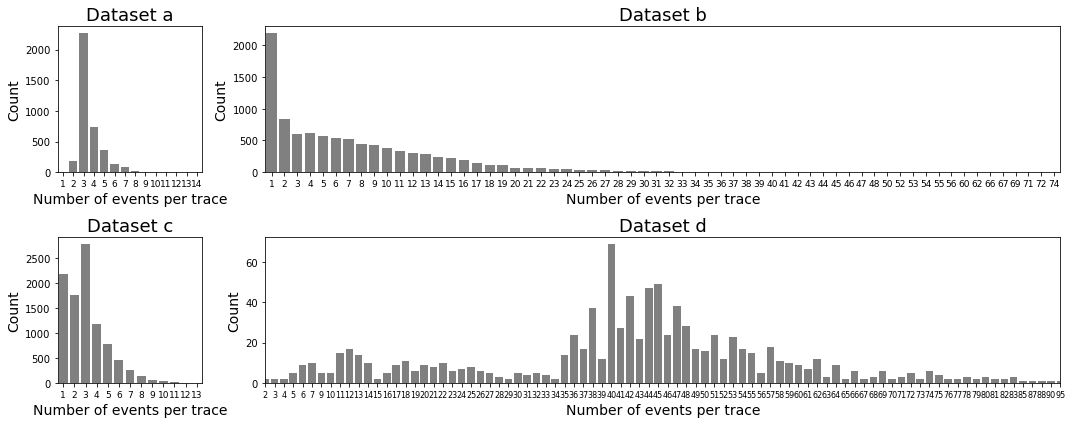

In [3]:
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[2,11])

i = 0
for key, dataset in df_dict.items():

    ax = plt.subplot(gs[i])
    sns.countplot(dataset.groupby(["CaseID"]).agg({"ActivityID":'count'})["ActivityID"], color='gray', ax = ax)
    if key == 'd':
        plt.xticks(rotation=0, fontsize=8)
        plt.xlim((0,85))
    else:
        plt.xticks(rotation=0, fontsize=9)
    plt.xlabel("Number of events per trace", fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.title("Dataset " + key,fontsize=18)
    i+=1
plt.tight_layout()
plt.plot()

[]

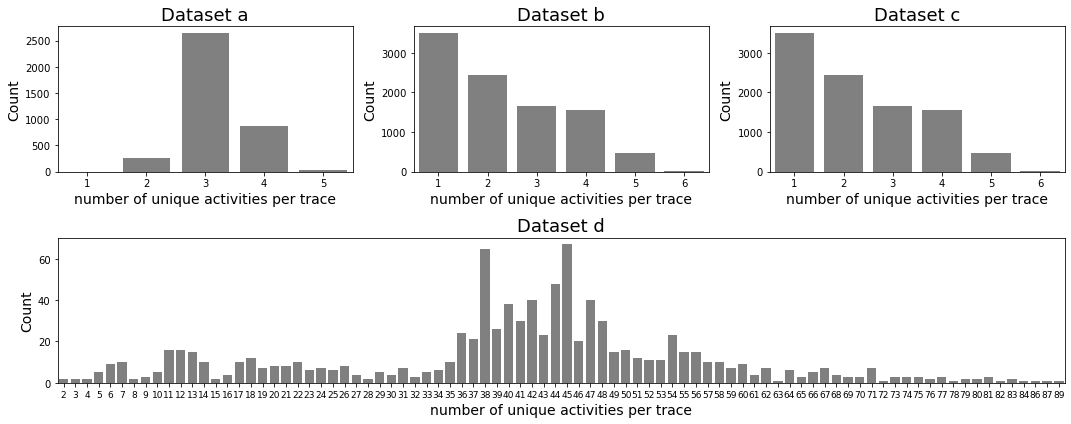

In [4]:
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(2, 3, width_ratios=[1,1,1])

i = 0
for key, dataset in df_dict.items():

    ax = plt.subplot(gs[i])
    if i == 3:
        ax = plt.subplot(gs[i:])
        plt.xlim((0,85))
        plt.xticks(rotation=0, fontsize=9)
    sns.countplot(dataset.groupby(["CaseID"]).agg({"ActivityID":'nunique'})["ActivityID"], color='gray', ax = ax)
    plt.xlabel("number of unique activities per trace", fontsize=14)
    plt.ylabel("Count",fontsize=14)
    plt.title("Dataset " + key,fontsize=18)
    i+=1
plt.tight_layout()
plt.plot()

In [22]:
## Evaluate baseline results and save to pickle file

path_baseline_results = '../output/maes/baseline/'

a_complete = os.path.join(path_baseline_results,'suffix_and_remaining_time_helpdesk.csv')
b_complete = os.path.join(path_baseline_results,'suffix_and_remaining_time_bpi_12_w.csv')
c_complete = os.path.join(path_baseline_results,'suffix_and_remaining_time_bpi_12_w_no_repeat.csv')
d_complete = os.path.join(path_baseline_results,'suffix_and_remaining_time_env_permit.csv')

a_complete = pd.read_csv(a_complete)
b_complete = pd.read_csv(b_complete)
c_complete = pd.read_csv(c_complete)
d_complete = pd.read_csv(d_complete)

a_reduced = os.path.join(path_baseline_results,'suffix_and_remaining_time_helpdesk_reduced.csv')
b_reduced = os.path.join(path_baseline_results,'suffix_and_remaining_time_bpi_12_w_reduced.csv')
c_reduced = os.path.join(path_baseline_results,'suffix_and_remaining_time_bpi_12_w_no_repeat_reduced.csv')
d_reduced = os.path.join(path_baseline_results,'suffix_and_remaining_time_env_permit_reduced.csv')

for file in [a_reduced, b_reduced,c_reduced,d_reduced]:
    print("Last modified: %s" % time.ctime(os.path.getmtime(file)))

a_reduced = pd.read_csv(a_reduced)
b_reduced = pd.read_csv(b_reduced)
c_reduced = pd.read_csv(c_reduced)
d_reduced = pd.read_csv(d_reduced)


df_dict = {
    'a_complete': a_complete,
    'b_complete': b_complete,
    'c_complete': c_complete,
    'd_complete': d_complete,
    'a_reduced': a_reduced,
    'b_reduced': b_reduced,
    'c_reduced': c_reduced,
    'd_reduced': d_reduced
}

for dataset in df_dict.keys():
    tmp = df_dict[dataset].groupby(["Prefix length"]).apply(lambda x:mean_absolute_error(x['Ground truth times'], x['Predicted times'])/86400).to_dict()
    tmp = {k:v for k,v in tmp.items() if k in list(range_dict[dataset])}
    pickle.dump(list(tmp.values()), open(path_baseline_results + dataset +'.pkl', "wb"))

Last modified: Sun Jun  6 15:29:46 2021
Last modified: Sun Jun  6 15:29:46 2021
Last modified: Sun Jun  6 15:29:46 2021
Last modified: Sun Jun  6 15:29:46 2021


In [23]:
train_time = {
    'baseline':{
        'a':2462.0/60,
        'b':12638.0/60,
        'c':4140.0/60,
        'd':8209.0/60
    },
#     'regression':{
#         dataset:pickle.load(open('output/maes/regression/0/' +'regression_'+dataset+'_reduced.pkl', 'rb'))['fit_time'].sum()/60.0 for dataset in ['a','b','c','d']
#     },
    't2e':{
        dataset:pickle.load(open('../output/maes/t2e/0/' +'t2e_'+dataset+'_reduced.pkl', 'rb'))['fit_time'].sum()/60.0 for dataset in ['a','b','c','d']
    }
}

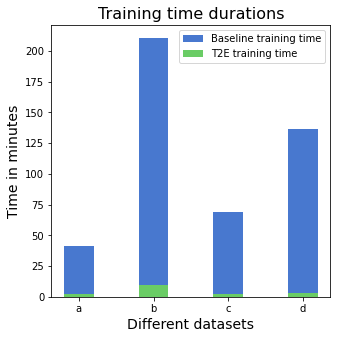

In [24]:
plt.figure(figsize=(5,5));
plt.bar(train_time['baseline'].keys(),train_time['baseline'].values(), label='Baseline training time', width=0.4 );
plt.bar(train_time['t2e'].keys(),train_time['t2e'].values(), label='T2E training time', width=0.4);
plt.ylabel("Time in minutes", fontsize=14);
plt.xlabel("Different datasets", fontsize=14);
plt.title('Training time durations', fontsize=16);
plt.legend();

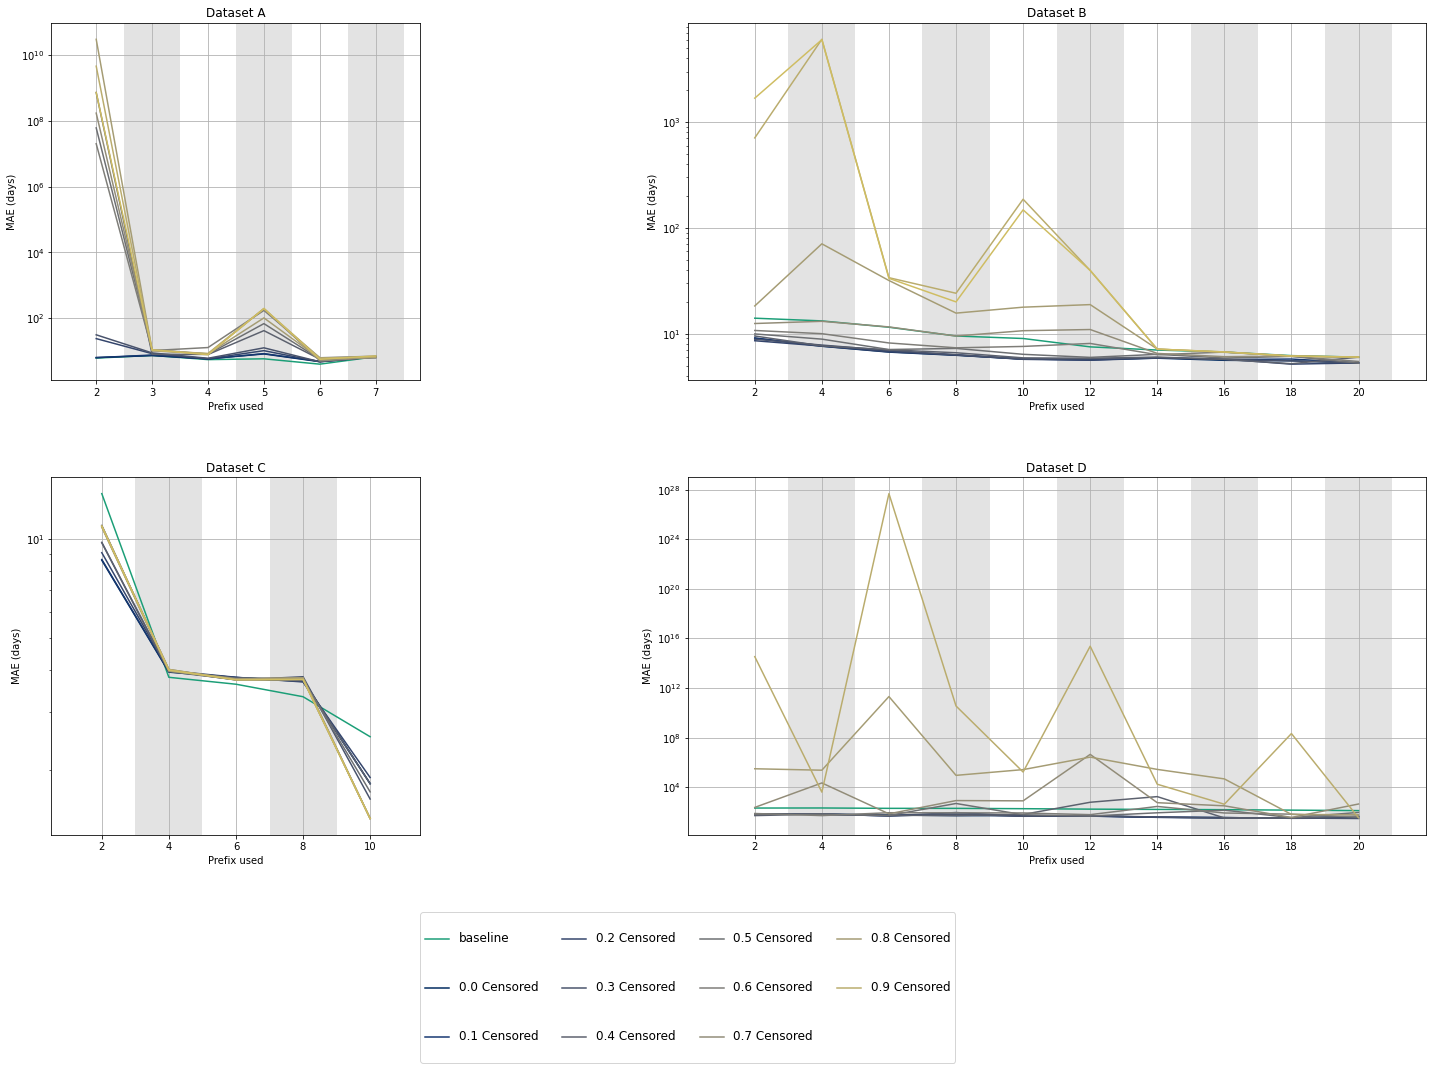

In [26]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 15)) 
gs = gridspec.GridSpec(2, 2, width_ratios=[1,2])
p = 0
bc = plt.cm.get_cmap('Dark2').colors[0]
c = []
c.append(bc)
cm = plt.cm.get_cmap('cividis').colors
for i in range(10,250,20):
    c.append(cm[i])
    
    
for dataset in ['a','b', 'c','d']:#['a','b','c','d']:
    cases = []
    labels= []

    ## Load baseline:
    path_baseline_complete = '../output/maes/baseline/0/'
    baseline_complete = pickle.load(open(path_baseline_complete + dataset +'_complete.pkl', 'rb'))
    
    cases.append(baseline_complete)
    labels.append("\nbaseline\n")
    
    
    ## Load grid search results prc
    
    path_t2e_prc = '../output/maes/prc/'+dataset+'/'
    for prc in sorted(os.listdir(path_t2e_prc)):
        if 'pkl' in prc:
            grid_results_t2e_prc = list(np.squeeze(pickle.load(open(path_t2e_prc + prc, 'rb')).groupby(["prefix"]).agg({"MAE":"min"}).values))
            cases.append(grid_results_t2e_prc)
            labels.append("\n"+prc.split('_')[0] + " Censored"+"\n")

    
    ax = plt.subplot(gs[p])
    X = np.array(range_dict[dataset])
    for j,case in enumerate(cases):
        
        if dataset in ['a']:
            steps = [-0.15, -0.05, 0.05, 0.15]
            width = 0.1
        elif dataset in ['c']:
            steps = [-0.3,-0.1, 0.1, 0.3]
            width =0.2
        else:
            steps = [-0.4,-0.1, 0.2, 0.5]
            width=0.3
            
        ax.plot(
            X, case,
            label  = labels[j],
            color = c[j]
        );


    
    
    for i, span in enumerate(X):
        if dataset == 'a':
            ax.axvspan(span-0.5, span+0.5, facecolor='#767676', alpha=(i%2)*0.2)
        else:
            ax.axvspan(span-1, span+1, facecolor='#767676', alpha=(i%2)*0.2)

    ax.set_xticks(range_dict[dataset])
    ax.set_xlabel("Prefix used")
    ax.set_ylabel("MAE (days)")
    ax.set_title("Dataset " + dataset.upper())
    ax.set_yscale('log')
    ax.grid()
    p+=1


ax.legend(loc='upper center', bbox_to_anchor=(0.0, -0.2) , ncol=4, frameon = True, fancybox =True, shadow = False, framealpha=0.8,fontsize=12)
# plt.subplots_adjust(right=0.85)

plt.style.use('seaborn-deep')
gs.tight_layout(fig,h_pad=5, w_pad=0)
plt.show()